# Melbourne Suburb Analysis based on School


The r^2 value is: 0.03513057599167403


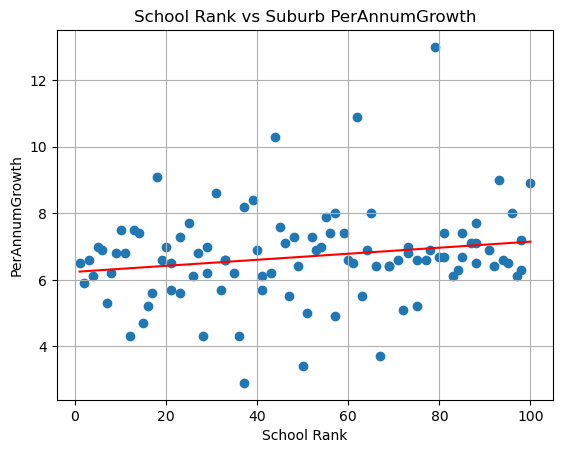

The r^2 value is: 0.08759920710429471


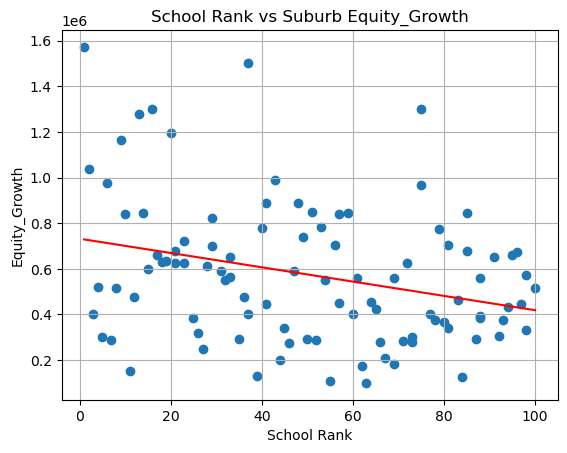

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pathlib import Path
import scipy.stats as stats


# Load data from CSV files

## File Used --- 
##  Melbourne_Suburb_data.csv
##  top100_high_school_melbourne.csv

# Set the path of the files which will be used for analsysis
# Set the path of Melbourne Suburb Data
melb_sub_data_to_load = Path("Resources/Melbourne_Suburb_data.csv")

## Set the path of the Top100_high_school_melbourne.csv
school_suburb_data_to_load = Path("Resources/top100_high_school_melbourne.csv")

# Read School and Suburb Data File and store into Pandas DataFrames
melb_sub_data = pd.read_csv(melb_sub_data_to_load)
school_suburb_data = pd.read_csv(school_suburb_data_to_load)

## Change the column name to Suburb
melb_sub_data.rename(columns={'Locality': 'Suburb'}, inplace=True)


# Merge data on suburb name
merged_suburb_school_data = pd.merge(school_suburb_data, melb_sub_data, on='Suburb', how="left")

# merged_suburb_school_data[["Suburb", "School_Name"]].head()
# merged_suburb_school_data.head()

# save the merged data to a csv file
merged_suburb_school_data.to_csv("Resources/merged_suburb_school_data.csv", index_label="Index_Number")
# print Suburb_School_Name_Rank_PerAnnumGrowth
merged_suburb_school_data[["Suburb","School_Name", "Rank", "PerAnnumGrowth"]]
# save Suburb_School_Name_Rank_PerAnnumGrowth in a different csv file
merged_suburb_school_data[["Suburb","School_Name", "Rank", "PerAnnumGrowth"]].to_csv("Resources/output/school_suburb_ranking.csv", index_label="Number")

## Function to calculate Correlation Coefficient and plot graph
def create_regression_plots(x_values, y_values, x_point, y_point):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    # plt.annotate(line_eq,(x_point,y_point),fontsize=15,color="red")
    plt.xlabel('School Rank')
    plt.ylabel (y_values.name)
    plt.title("School Rank vs "+ "Suburb " + y_values.name)
    print(f"The r^2 value is: {rvalue**2}")
    plt.grid()
    plt.show()

## Get X axis and Y axis values
x_values = merged_suburb_school_data["Rank"]
y_values = merged_suburb_school_data["PerAnnumGrowth"]

## call create_regression_plots function to create the regression plot
create_regression_plots(x_values, y_values, 3, 3)

merged_suburb_school_data.head()

merged_suburb_school_data['Equity_Growth'] = merged_suburb_school_data['2023'] - merged_suburb_school_data['2013']
merged_suburb_school_data[["Suburb","School_Name", "Rank", "Equity_Growth", "PerAnnumGrowth"]].head()

## Get X axis and Y axis values
x_values = merged_suburb_school_data["Rank"]
y_values = merged_suburb_school_data["Equity_Growth"]

## call create_regression_plots function to create the regression plot
create_regression_plots(x_values, y_values, 3, 3)



In [3]:
## Median per annum Growth

median_per_annum_growth = melb_sub_data['PerAnnumGrowth'].median()

print(f"The median per annum growth value is: {median_per_annum_growth}")

## Median Equity Growth

melb_sub_data['Equity_Growth'] = melb_sub_data['2023'] - melb_sub_data['2013']
median_equity_growth = melb_sub_data['Equity_Growth'].median()

print(f"The median equity growth value is: {median_equity_growth}")

The median per annum growth value is: 6.8
The median equity growth value is: 375000.0


In [4]:
## Top performing Suburb based on Ranking of schools

In [9]:
# Sort and show top five suburb based on equity growth
top_suburb = merged_suburb_school_data.sort_values("Equity_Growth", ascending=False)
top_suburb[["Suburb","School_Name", "Rank", "Equity_Growth", "PerAnnumGrowth"]].head(10)



,Suburb,School_Name,Rank,Equity_Growth,PerAnnumGrowth
0,EAST MELBOURNE,Mac.Robertson Girls' High School,1,1573000,6.5
36,HAWTHORN EAST,Auburn High School,37,1502500,8.2
74,CANTERBURY,Camberwell High School,75,1302500,5.2
15,CANTERBURY,Canterbury Girls Secondary College,16,1302500,5.2
12,PARKVILLE,University High School,13,1277000,7.5
19,BRIGHTON EAST,Brighton Secondary College,20,1195000,7.0
8,BALWYN NORTH,Balwyn High School,9,1165000,6.8
1,SOUTH YARRA,Melbourne High School,2,1037500,5.9
42,KEW EAST,Kew High School,43,990000,6.2
5,MCKINNON,McKinnon Secondary College,6,975000,6.9


In [6]:
## Bottom performing Suburb based on Equity Growth

In [10]:
# Sort and show top five suburb based on equity growth
top_suburb = merged_suburb_school_data.sort_values("Equity_Growth", ascending=True)
top_suburb[["Suburb","School_Name", "Rank", "Equity_Growth", "PerAnnumGrowth"]].head(10)


,Suburb,School_Name,Rank,Equity_Growth,PerAnnumGrowth
62,DONALD,Donald High School,63,100000,5.5
54,WYCHEPROOF,Wycheproof P-12 College,55,108500,7.9
82,KERANG,Kerang Technical High School,84,128000,6.3
38,WARRACKNABEAL,Warracknabeal Secondary College,39,132500,8.4
10,CORRYONG,Corryong College,11,153500,6.8
61,MURTOA,Murtoa College,62,172500,10.9
67,HORSHAM,Horsham College,69,185000,6.4
43,CHARLTON,Charlton College,44,200000,10.3
66,ARMSTRONG CREEK,Oberon High School,67,207500,3.7
26,BALLARAT EAST,Woodmans Hill Secondary College,27,247500,6.8


In [8]:
# Calculate the Pearson correlation coefficient
correlation, p_value = stats.pearsonr(merged_suburb_school_data['Equity_Growth'], merged_suburb_school_data['Rank'])
print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: -0.29597163226278067
P-value: 0.0029353964662798796
